Load and Prepare Data

In [457]:
import pandas as pd
df=pd.read_csv("housePrice.csv")
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [458]:
df.shape

(3479, 8)

In [459]:
df.columns

Index(['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price',
       'Price(USD)'],
      dtype='object')

Data Cleaning & missing values

In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3479 non-null   object 
 1   Room        3479 non-null   int64  
 2   Parking     3479 non-null   bool   
 3   Warehouse   3479 non-null   bool   
 4   Elevator    3479 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3479 non-null   float64
 7   Price(USD)  3479 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 146.2+ KB


Discover Missing values

In [461]:
df.isnull().sum()

Area           0
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64

Remove Missing values

In [462]:
df.dropna(inplace=True)

In [463]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3456 entries, 0 to 3478
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3456 non-null   object 
 1   Room        3456 non-null   int64  
 2   Parking     3456 non-null   bool   
 3   Warehouse   3456 non-null   bool   
 4   Elevator    3456 non-null   bool   
 5   Address     3456 non-null   object 
 6   Price       3456 non-null   float64
 7   Price(USD)  3456 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 172.1+ KB


Checking Duplicates Dataset

In [464]:
print(f'Number of Duplicated in our datase is : {df.duplicated().sum()}')
print(f'The percentage of Duplicated in our dataset is : {round(df.duplicated().sum() * 100 / len(df),1)}')

Number of Duplicated in our datase is : 208
The percentage of Duplicated in our dataset is : 6.0


In [465]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [466]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3248 entries, 0 to 3247
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3248 non-null   object 
 1   Room        3248 non-null   int64  
 2   Parking     3248 non-null   bool   
 3   Warehouse   3248 non-null   bool   
 4   Elevator    3248 non-null   bool   
 5   Address     3248 non-null   object 
 6   Price       3248 non-null   float64
 7   Price(USD)  3248 non-null   float64
dtypes: bool(3), float64(2), int64(1), object(2)
memory usage: 136.5+ KB


Feature Engineering

Change the type of Area

In [467]:
df["Area"] = df["Area"].str.replace(',', '',regex=True).astype(int) 

In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3248 entries, 0 to 3247
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Area        3248 non-null   int64  
 1   Room        3248 non-null   int64  
 2   Parking     3248 non-null   bool   
 3   Warehouse   3248 non-null   bool   
 4   Elevator    3248 non-null   bool   
 5   Address     3248 non-null   object 
 6   Price       3248 non-null   float64
 7   Price(USD)  3248 non-null   float64
dtypes: bool(3), float64(2), int64(2), object(1)
memory usage: 136.5+ KB


In [469]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,3248.0,9.365872e+06,3.277906e+08,30.0,7.000000e+01,9.000000e+01,1.220000e+02,1.616000e+10
Room,3248.0,2.088054e+00,7.647163e-01,0.0,2.000000e+00,2.000000e+00,2.000000e+00,5.000000e+00
Price,3248.0,5.478118e+09,8.267916e+09,3600000.0,1.420000e+09,2.977500e+09,6.200000e+09,9.240000e+10
Price(USD),3248.0,1.826039e+05,2.755972e+05,120.0,4.733333e+04,9.925000e+04,2.066667e+05,3.080000e+06


In [470]:
df.drop(columns='Price(USD)',inplace=True)

In [471]:
df['price_per_meter']=df['Price']/df['Area']

Visualization 

checking feature

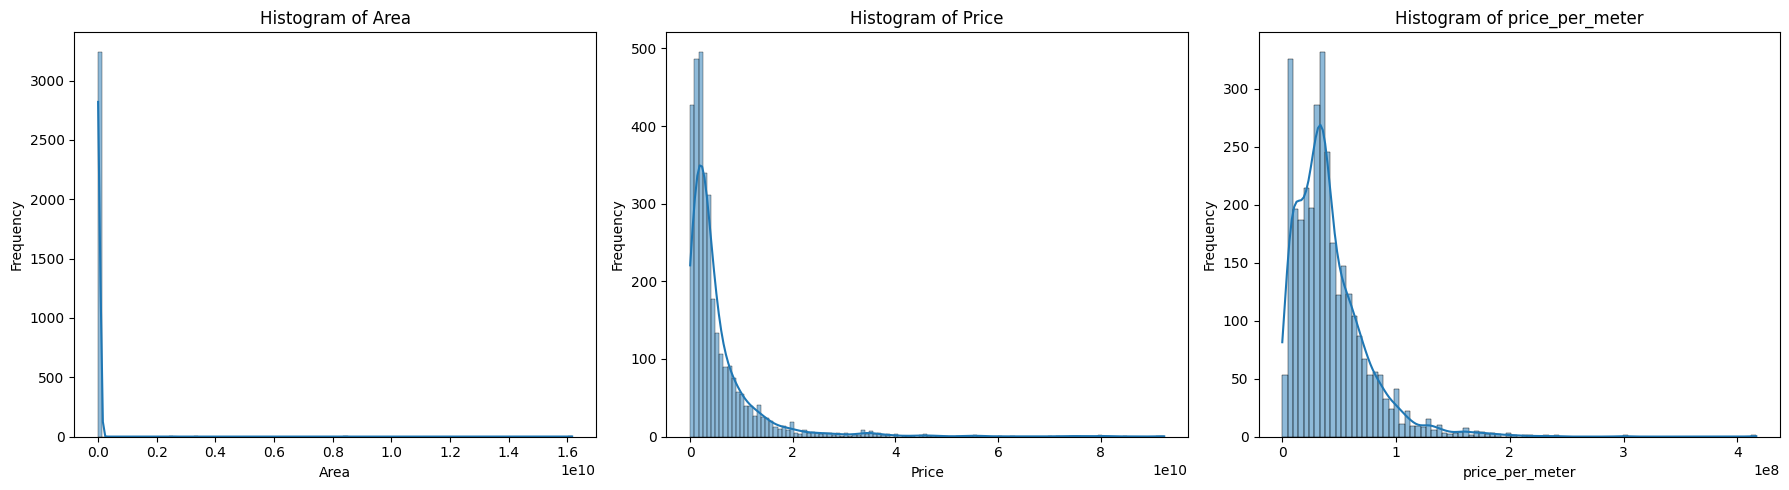

In [472]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Area', 'Price', 'price_per_meter']

plt.figure(figsize=(18, 5))

for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)  
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



Description

    1. As it can be seen , (Price & price_per_meter) feature is Right-Skewed.
    2.Outliers in  (Area & price & price_per_meter) are obvious now(on the right side)
 

C:\Users\Partiran\AppData\Local\Temp\ipykernel_9008\642195232.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
C:\Users\Partiran\AppData\Local\Temp\ipykernel_9008\642195232.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
C:\Users\Partiran\AppData\Local\Temp\ipykernel_9008\642195232.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
C:\Users\Partiran\AppData\Local\Temp\ipykernel_9008\642195232.py:11: FutureWarning: 

Passi

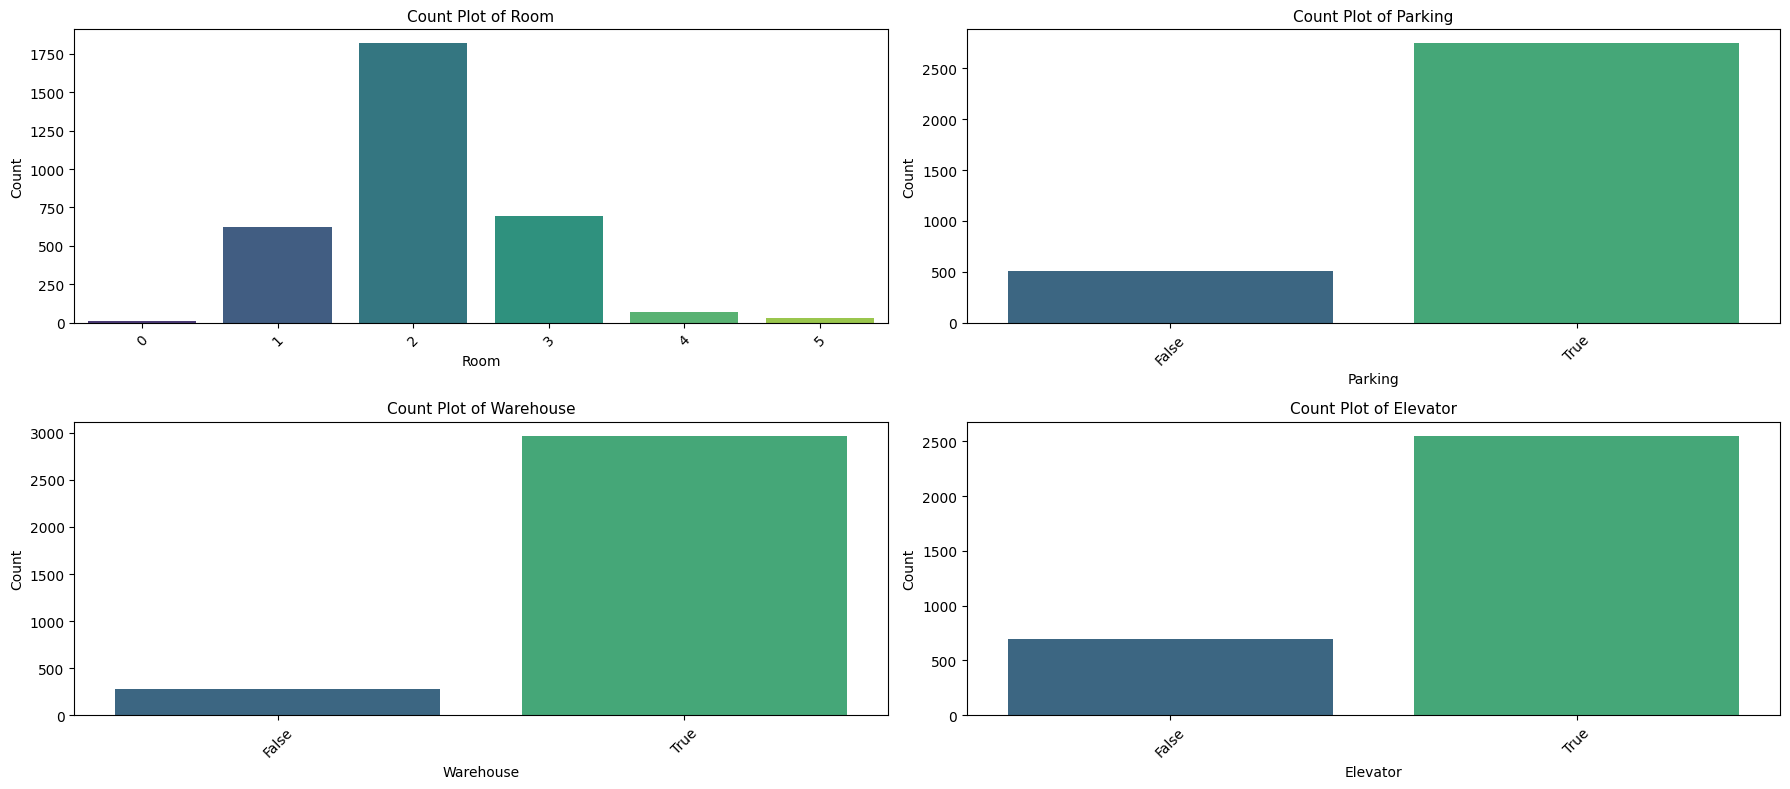

In [473]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Room', 'Parking', 'Warehouse', 'Elevator']

plt.figure(figsize=(18, 8))

for i, col in enumerate(features, 1):
    if col in df.columns:
        plt.subplot(2, 2, i)
        sns.countplot(data=df, x=col, palette='viridis')
        plt.title(f'Count Plot of {col}', fontsize=11)
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Description

    1.About 2000 houses have exactly 2 rooms (most houses)
    2.Distribution of 1 and 3 rooms are roughly the same (a little more 3 rooms)
    3.we have not many houses with 4 or 5 rooms (in total about 150 houses)
    4.houses without room is rarely seen
    5.More than 2500 houses with parking & warehouse & Elevator 
    6.Most houses have Parking , Warehouse and Elevator (all these three features )
    7.Most houses have Warehouse.(houses without warehouse are very low(less than 1000 more than 500))
    8.Those houses without Parking and Elevator have the same distribution(less than 1000 more than 500)


Conclusion

    1.Mean of rooms is roughly 2.
    2.Most houses have Parking , Warehouse and Elevator (all these three features )

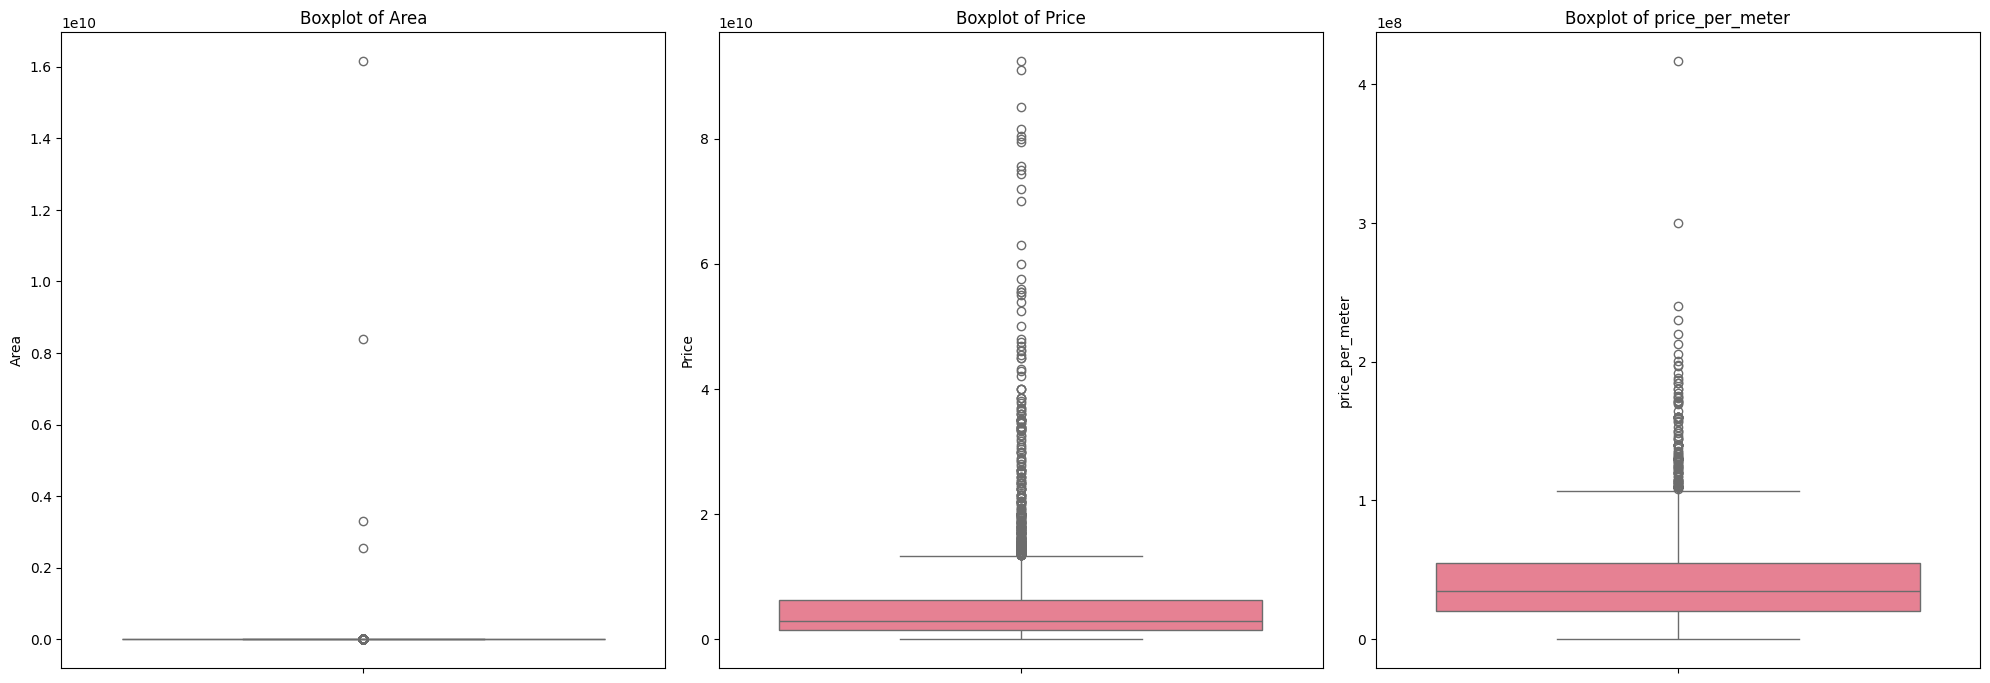

In [474]:
import matplotlib.pyplot as plt
import seaborn as sns
features = df[['Area', 'Price','price_per_meter']]
# Define color palette
palette = sns.color_palette("husl",len(features))
#to show Outliers in data 
plt.figure(figsize=(20, 20))
for i, col in enumerate(features, 1):
    plt.subplot(3,3, i)
    sns.boxplot(y=df[col], color=palette[i-1])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Description

    Outliers in  (Area & price & price_per_meter) are obvious now

C:\Users\Partiran\AppData\Local\Temp\ipykernel_9008\705010689.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_mean_house['Address'], y=top_mean_house['Price'],palette="Set2")


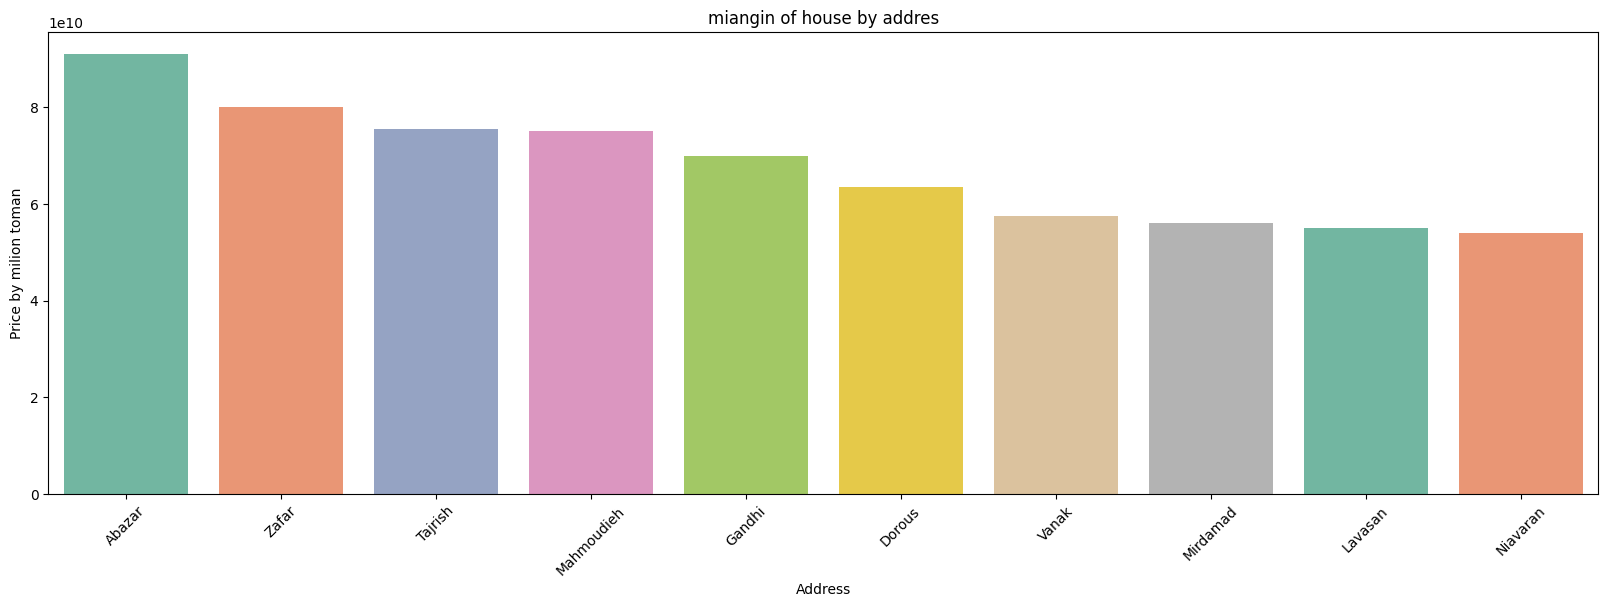

In [475]:
import seaborn as sns
import matplotlib.pyplot as plt

top_mean_house=df.groupby(['Address','Room','Parking'])['Price'].mean().sort_values(ascending=False).reset_index().head(10)

plt.figure(figsize=(20,6))
sns.barplot(x=top_mean_house['Address'], y=top_mean_house['Price'],palette="Set2")
plt.title('miangin of house by addres')
plt.ylabel('Price by milion toman')
plt.xlabel('Address')
plt.xticks(rotation=45)
plt.show()

Description

    Top ten Addresses and room and parking with the highest price

In [476]:
round(df.groupby(["Room" , "Warehouse","Parking"])["Price"].mean().to_frame())

Price
Room Warehouse Parking              
0    False     False    1.912075e+10
     True      False    5.033333e+08
               True     2.235000e+08
1    False     False    1.317869e+09
               True     1.516600e+09
     True      False    1.054504e+09
               True     2.109075e+09
2    False     False    1.424198e+09
               True     2.487981e+09
     True      False    1.558391e+09
               True     3.674771e+09
3    False     False    8.604542e+09
               True     6.324375e+09
     True      False    2.072083e+09
               True     1.130695e+10
4    False     False    6.200000e+09
               True     2.410000e+09
     True      True     2.669697e+10
5    False     False    9.999000e+09
               True     9.750000e+09
     True      True     4.014385e+10

In [477]:
df[['Parking', 'Warehouse', 'Elevator']] = df[['Parking', 'Warehouse', 'Elevator']].astype(int)

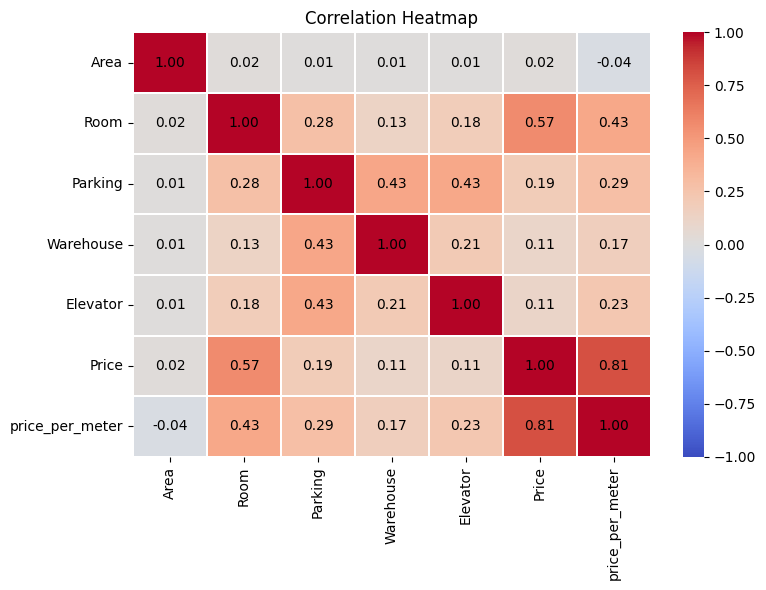

In [478]:

numericalcolumns=df.select_dtypes(include=['int64', 'float64'])
# Correlation Heatmap - ensure at least 2 numeric columns are available
if numericalcolumns.shape[1] >= 2:
    plt.figure(figsize=(8,6))
    corr = numericalcolumns.corr()
    sns.heatmap(corr, cmap='coolwarm', fmt='.2f',annot_kws={'color': 'black'}, vmin=-1, vmax=1, linewidths=0.2, annot=True)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')



In [479]:
df_no_outliers = df.copy()
numerical_cols = df[['Area','Price','price_per_meter']]

bounds = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    bounds[col] = (lower, upper)


for col, (low, high) in bounds.items():
    df_no_outliers = df_no_outliers[(df_no_outliers[col] >= low) & (df_no_outliers[col] <= high)]

print(f"Rows before: {len(df)}")
print(f"Rows after removing outliers: {len(df_no_outliers)}")


Rows before: 3248
Rows after removing outliers: 2919


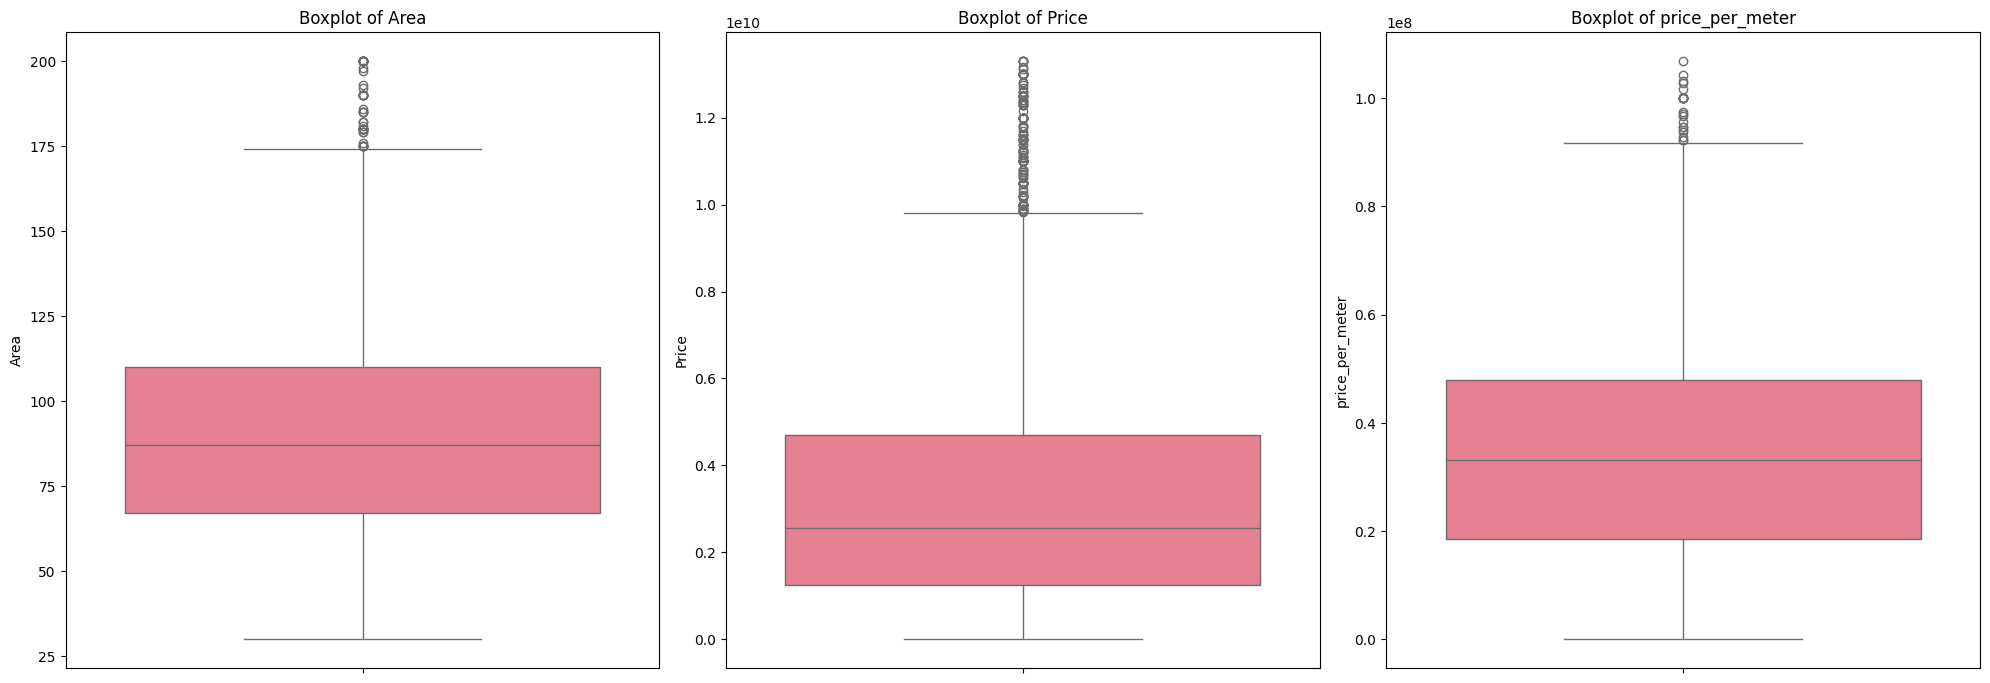

In [480]:
import matplotlib.pyplot as plt
import seaborn as sns

features = df_no_outliers[['Area', 'Price','price_per_meter']]
# Define color palette
palette = sns.color_palette("husl",len(features))
#to show Outliers in data 
plt.figure(figsize=(20, 20))
for i, col in enumerate(features, 1):
    plt.subplot(3,3, i)
    sns.boxplot(y=df_no_outliers[col], color=palette[i-1])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

Description

    Now we have more balanced data and its ready to be used for fitting.
    Due to we have dropped lots of data from dataset we can use of both(with outliers and without) to check the accuracy for each one .

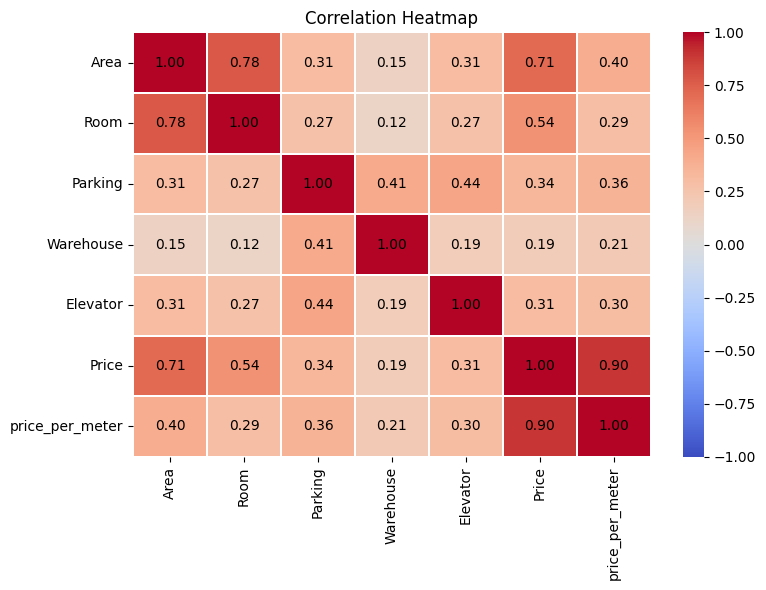

In [481]:

numericalcolumns=df_no_outliers.select_dtypes(include=['int64', 'float64'])
# Correlation Heatmap - ensure at least 2 numeric columns are available
if numericalcolumns.shape[1] >= 2:
    plt.figure(figsize=(8,6))
    corr = numericalcolumns.corr()
    sns.heatmap(corr, cmap='coolwarm', fmt='.2f',annot_kws={'color': 'black'}, vmin=-1, vmax=1, linewidths=0.2, annot=True)
    plt.title('Correlation Heatmap')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')



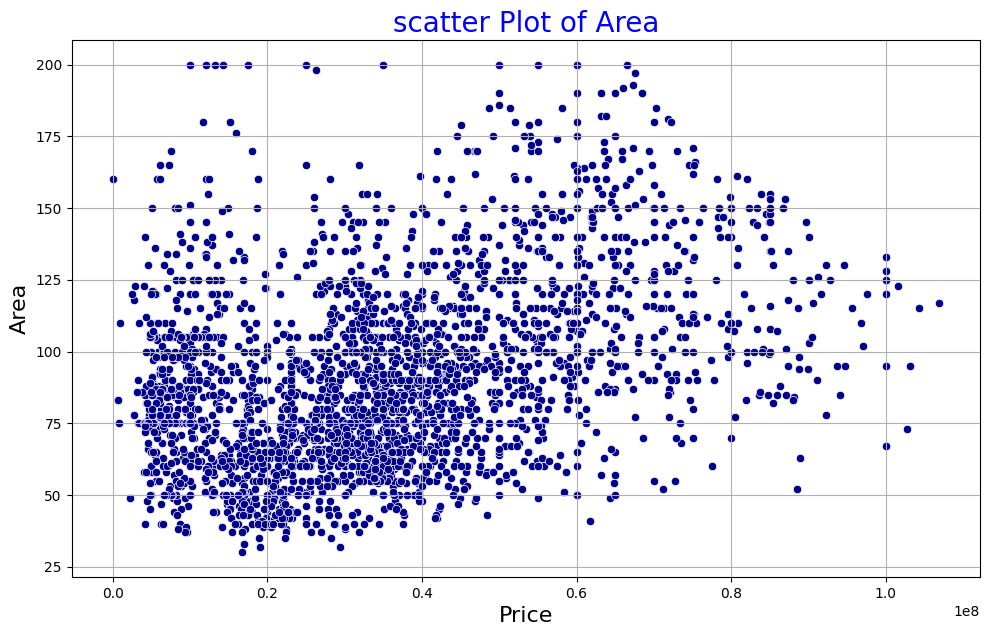

In [482]:

features = ['Area']

plt.figure(figsize=(10,30))
for idx, column in enumerate(features):
    plt.subplot(5, 1,  idx + 1)
    sns.scatterplot(x = df_no_outliers['price_per_meter'], y=df_no_outliers[column] , data = df, color='darkblue')
    plt.title(f'scatter Plot of {column}', color='blue', fontsize=20)
    plt.xlabel('Price', fontsize=16)
    plt.ylabel(column, fontsize=16)
    plt.grid()
plt.tight_layout()
plt.show()

C:\Users\Partiran\AppData\Local\Temp\ipykernel_9008\754785962.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Room', y=col, data=df_no_outliers, palette="Set2")
C:\Users\Partiran\AppData\Local\Temp\ipykernel_9008\754785962.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Room', y=col, data=df_no_outliers, palette="Set2")
C:\Users\Partiran\AppData\Local\Temp\ipykernel_9008\754785962.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Room', y=col, data=df_no_outliers, palette="Set2")


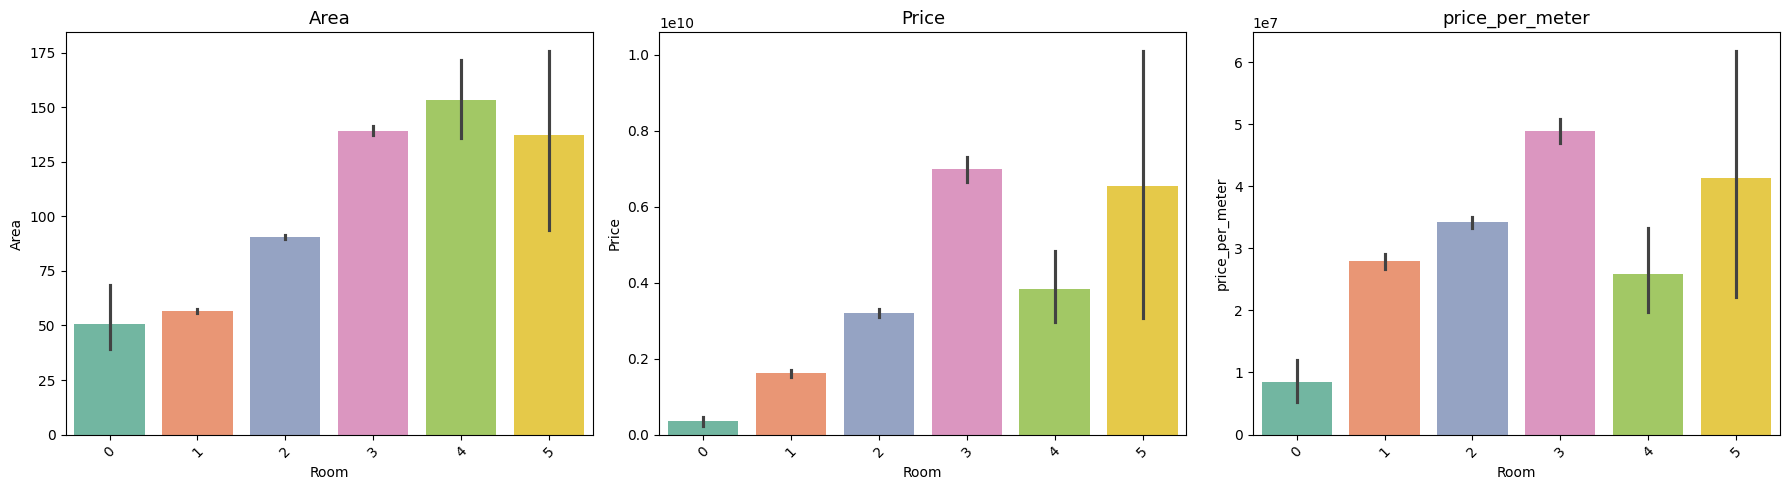

In [483]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical = ['Area', 'Price', 'price_per_meter']

plt.figure(figsize=(18, 5)) 

for i, col in enumerate(categorical, 1):  
    plt.subplot(1, len(categorical), i)   
    sns.barplot(x='Room', y=col, data=df_no_outliers, palette="Set2")
    plt.title(f'{col}', fontsize=13)
    plt.xlabel('Room')
    plt.ylabel(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
